## Prediction: Car Prices Using Multivariate Linear Regression
----------

#### Problem Statement
-----------
A new car manufacturer is looking to set up business in the US Market. They need to know the factors on which the pricing of a car depends on to take on their competition in the market. The company wants to know the variables the price depends on and to what extent does the variables explain the price of a car
#### Business Goal
----------
We need to build a model for the price of a car as a function of explanatory variables. 

### Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [5]:
car_df = pd.read_csv(r'C:\Users\jazee\Downloads\CarPrice_Assignment.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#Understanding the dataframe
# shape of the data
car_df.shape

(205, 26)

In [7]:
# information of the data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
# description of the data
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#we can see many variables which are categorical---feature selection will be required
#check if there are any missing values
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
car_df.describe() #description of data

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Processing the data-Cleaning

In [11]:
#drop car_ID using basic common sense
car_df=car_df.drop('car_ID',axis=1)

In [12]:
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
# just required only company name.take only company name from the df and remove the car name from it

car_df['CarName']=car_df['CarName'].apply(lambda name: name.split()[0])
#EXAMPLE
name = "Thomas Winter"
LastName = name.split()[1]
LastName

'Winter'

In [14]:
#rename the carname to Company
car_df.rename(index=str,columns={'CarName':'Company'},inplace=True)

In [15]:
#citimpg and highwaympg can be combined and take the average
car_df['avg_mpg']=(car_df['citympg']+car_df['highwaympg'])/2

In [16]:
#drop citympg and highwaympg
car_df=car_df.drop(['citympg','highwaympg'],axis=1)

In [17]:
#sympoling-make it string:categorical variable,not to be continous
car_df.symboling=car_df.symboling.astype(str)

In [18]:
car_df.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avg_mpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0


In [19]:
#the companies present in the dataset
car_df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
#misspelled/repeated company:correction...toyota-toyouta,volkswagen-vokswagen,vw etc

car_df.Company.replace('maxda','mazda',inplace=True)
car_df.Company.replace('Nissan','nissan',inplace=True)
car_df.Company.replace('porcshce','porsche',inplace=True)
car_df.Company.replace('toyouta','toyota',inplace=True)
car_df.Company.replace('vokswagen','volkswagen',inplace=True)
car_df.Company.replace('vw','volkswagen',inplace=True)


In [21]:
car_df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [22]:
# Calculating the Missing Values % contribution in DF

null_df = car_df.isna().mean().round(4) * 100

null_df.sort_values(ascending=False).head()

symboling     0.0
Company       0.0
price         0.0
peakrpm       0.0
horsepower    0.0
dtype: float64

In [23]:
# checking for duplicates

car_df.loc[car_df.duplicated()]

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avg_mpg


In [24]:
# Datatypes
car_df.dtypes

symboling            object
Company              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
price               float64
avg_mpg             float64
dtype: object

(205, 24)

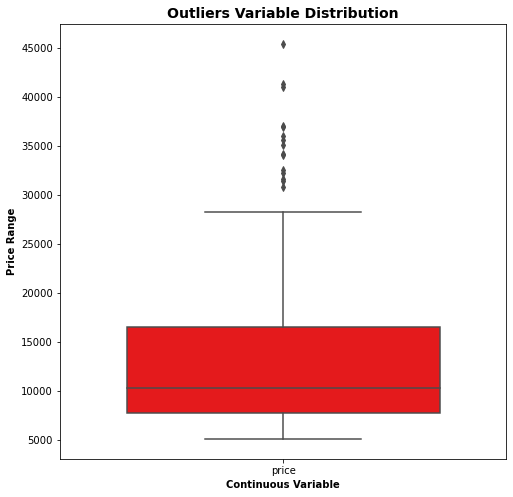

In [25]:
# Outlier Analysis of PRICE [target variable] for maximum amount of Inconsistency
outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=car_df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
car_df.shape

* An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.
* Here,there are some price ranges above 36000 which can be termed as outliers so we need to use standarization scaling.

In [26]:
# partitioning of Numerical and Categorical Variables
categorical = car_df.select_dtypes(include=['object']).columns
numerical = car_df.select_dtypes(exclude=['object']).columns
catdf = car_df[categorical]
numdf = car_df[numerical]

In [27]:
car_df.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avg_mpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0


In [28]:
car_df[categorical].head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [29]:
catdf.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [30]:
car_df[numerical].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avg_mpg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,24.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,24.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,22.5
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,27.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,20.0


In [31]:
numdf.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avg_mpg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,24.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,24.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,22.5
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,27.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,20.0


### Data Visualisation

### Pairplot
#### Numerical values 

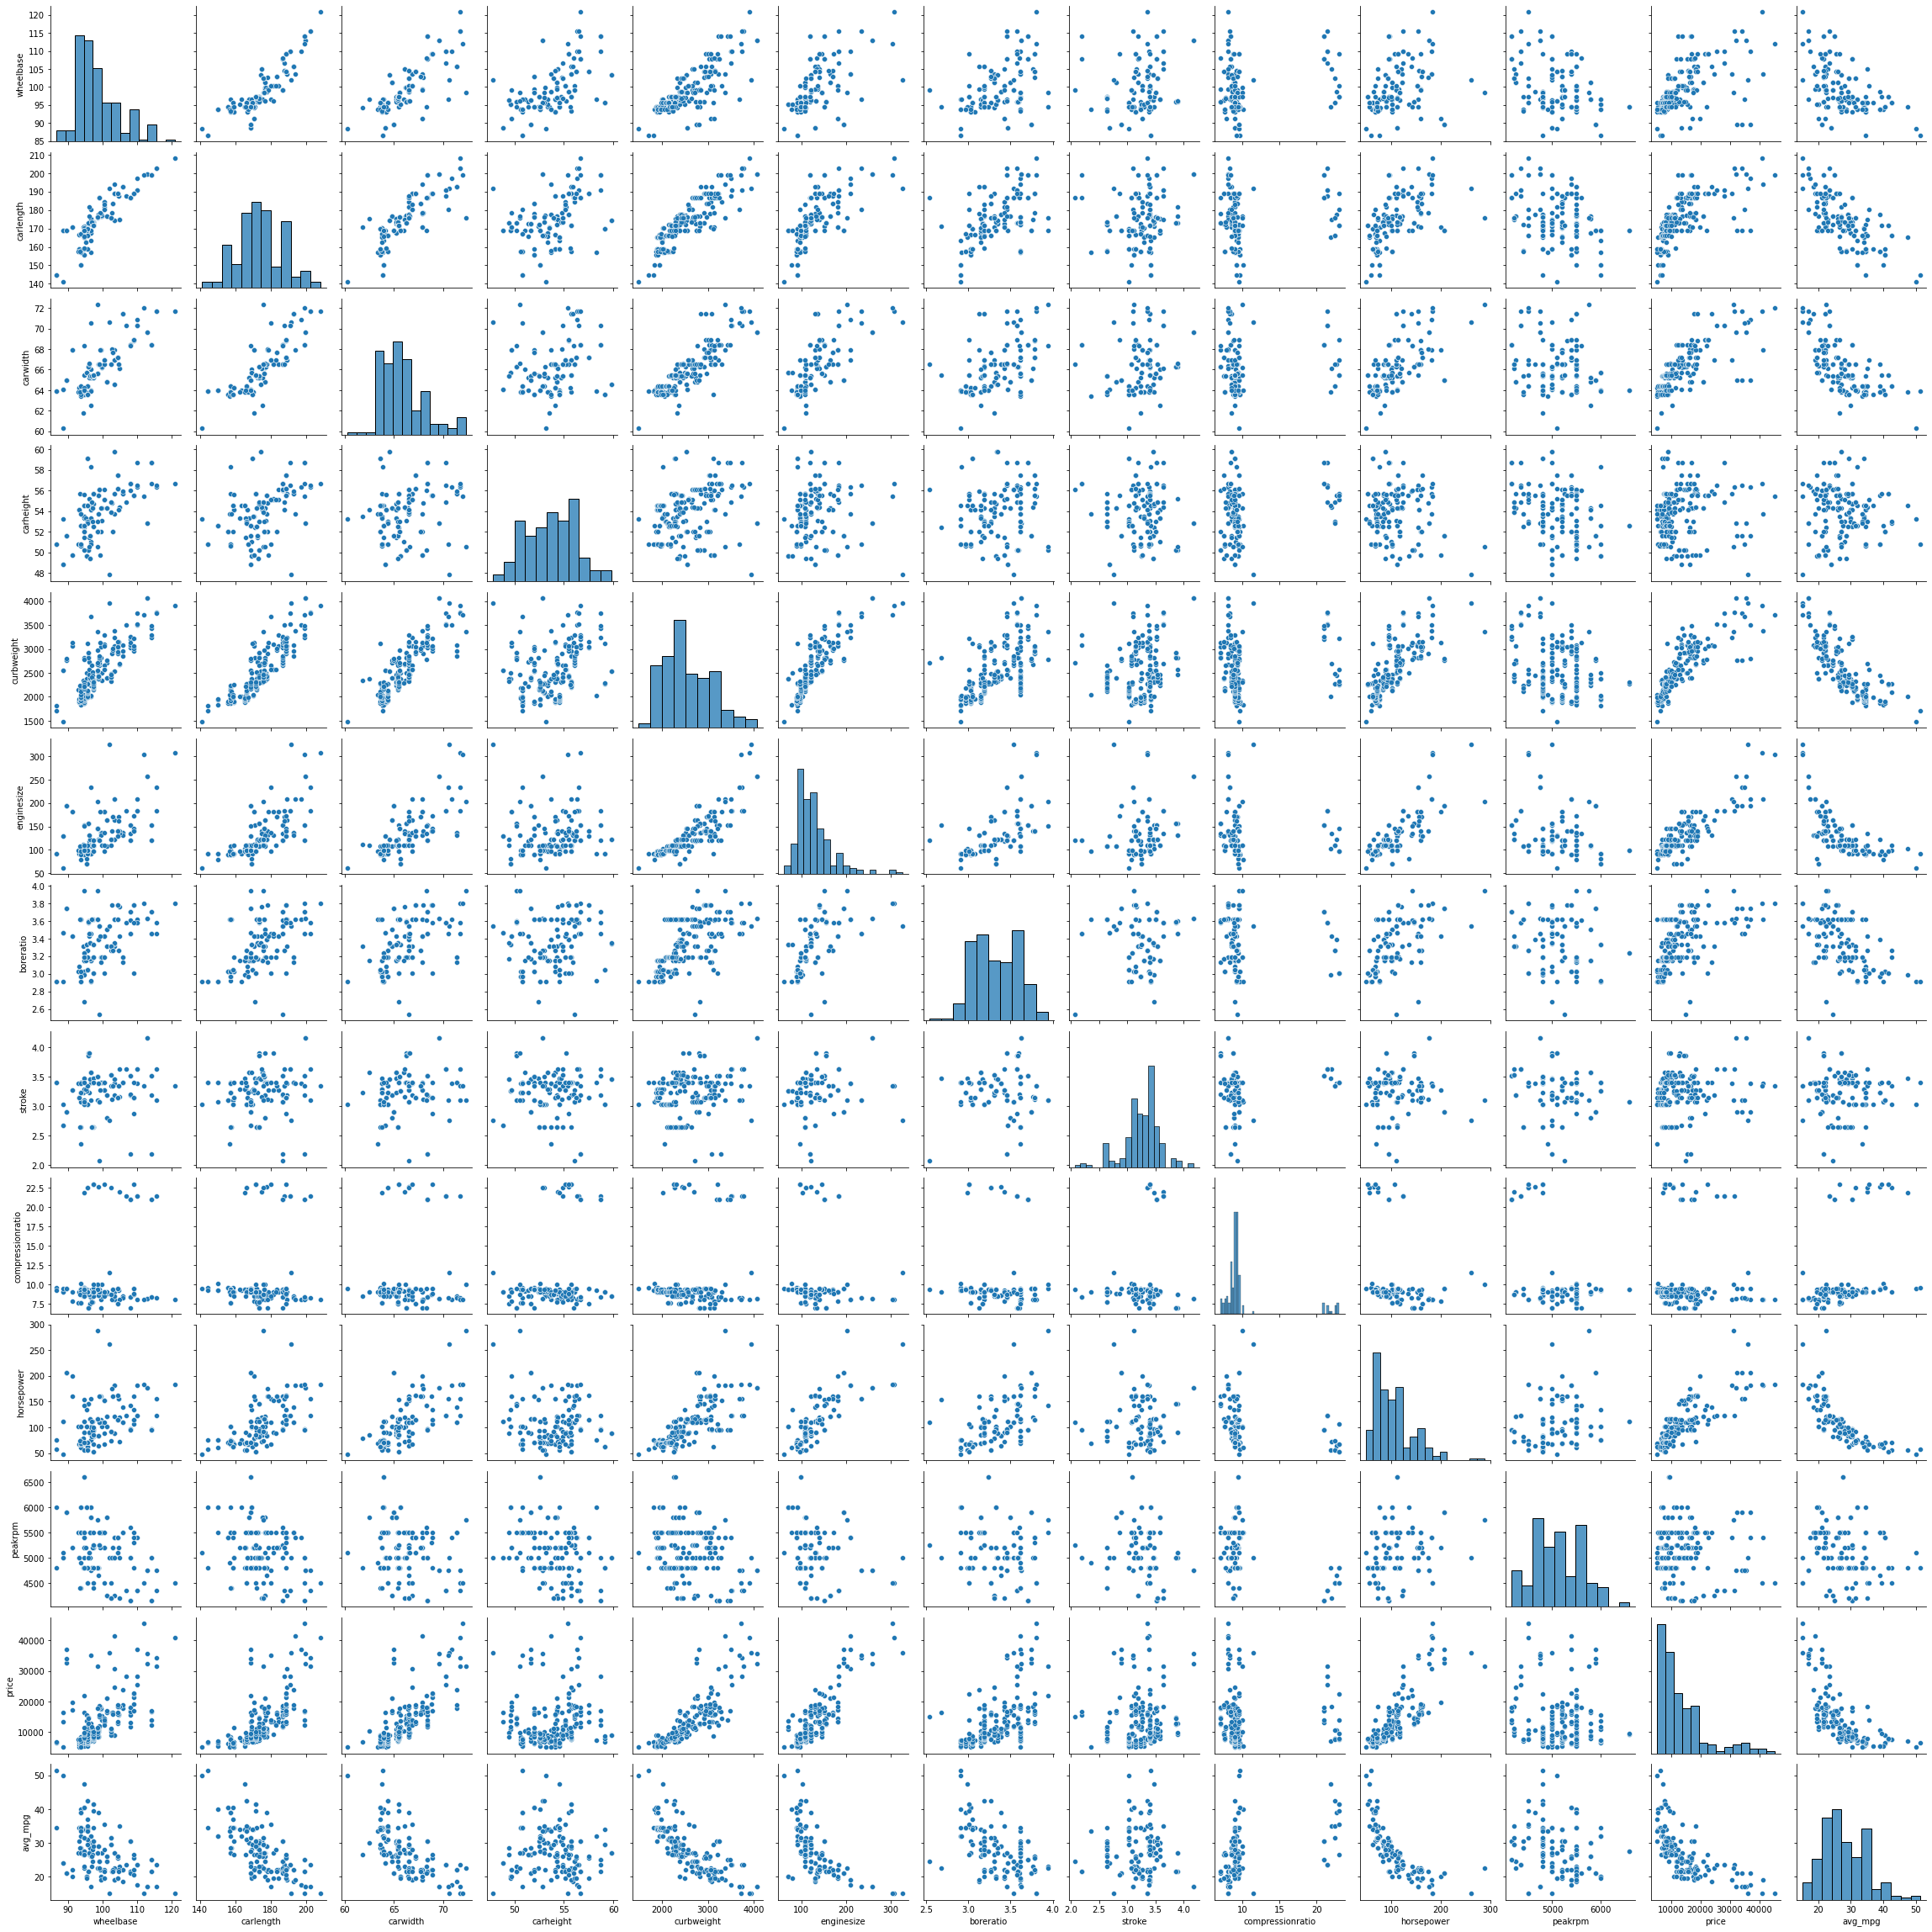

In [32]:
ax = sns.pairplot(numdf)

* When compared with price,we can see price doesn't have much correlation with carheight.
* Price has a negative correlation with avg_mpg and positive correlation with carwdidth,carlength,curbweight,enginesize and horsepower.

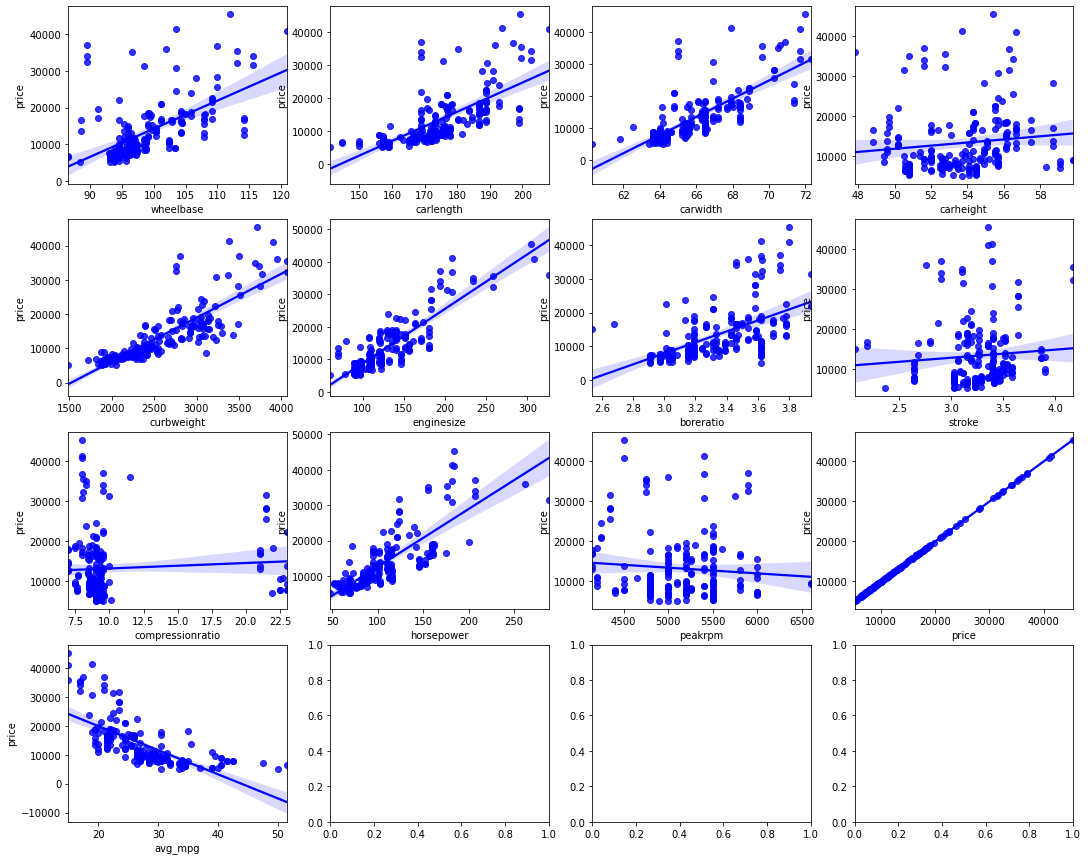

In [33]:
#fitting numerical values with price
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numdf[:len(numdf)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=car_df,ax=axes[x][y],color='b')

In [34]:
#Correlation matrix
numdf.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avg_mpg
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.577816,-0.511871
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.682920,-0.693200
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.759325,-0.665184
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,0.119336,-0.079321
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.835305,-0.783584
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.874145,-0.670689
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.553173,-0.590044
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,0.079443,-0.043372
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.067984,0.296318
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,0.808139,-0.791291


<AxesSubplot:>

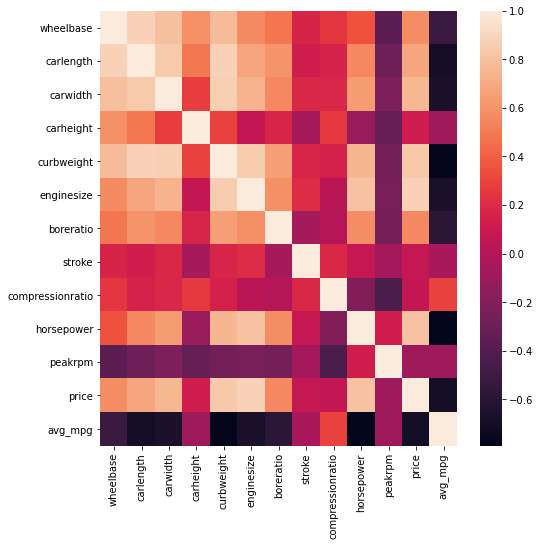

In [35]:
#heatmap
sns.heatmap(numdf.corr())

* wheelbase has high positive correlation with carlength,carwidth and curbweight
* carlength has high postive correlation with curbweight and negative correlation with highwaympg
* carwidth has high postive correlation with curbweight and engine size
* enginesize has high positive correlation with horsepower
* curbweight has high positive correlation with engine size and horse power and negative correlation with highwaympg
* horsepower has negative correlation with citympg and highwaympg
* citympg and highwaympg are highly correlated

Text(0.5, 1.0, 'Price Distribution Plot of Price')

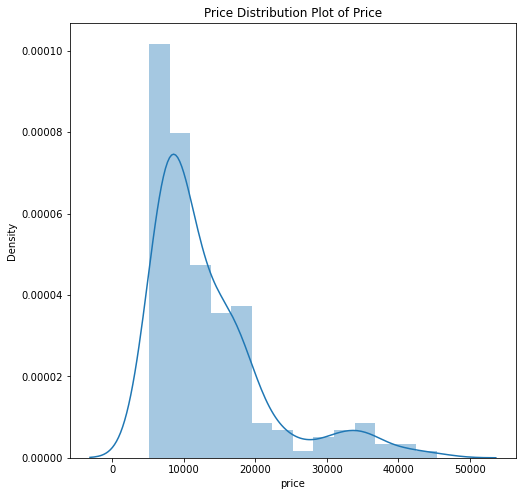

In [36]:
#Price distribution of cars
sns.distplot(car_df.price,kde=True)
plt.title('Price Distribution Plot of Price')

##### Plot is right skewed 
* Right skewed means that the smaller values occur in the data with higher frequency and the larger values occur with comparatively lesser frequency
* here, there are more cheaper cars in the dataset than expensive cars and maximum number of cars are in range of 20000

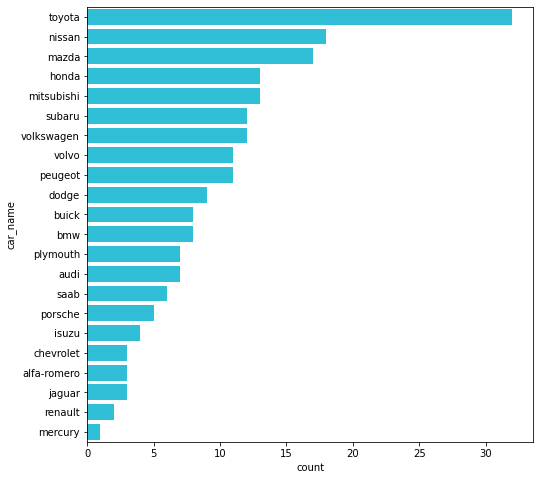

In [37]:
#Visualising car names
df=pd.DataFrame(car_df['Company'].value_counts()).reset_index().rename(columns={'index':'car_name','Company': 'count'})
plot = sns.barplot(y='car_name',x='count',data=df,color='#13d2f2')

* The most suitable and least suitable cars are toyota and mercury respectively.
* we can visualise many other numerical features too using these libraries.

### Boxplot
#### Categorical values

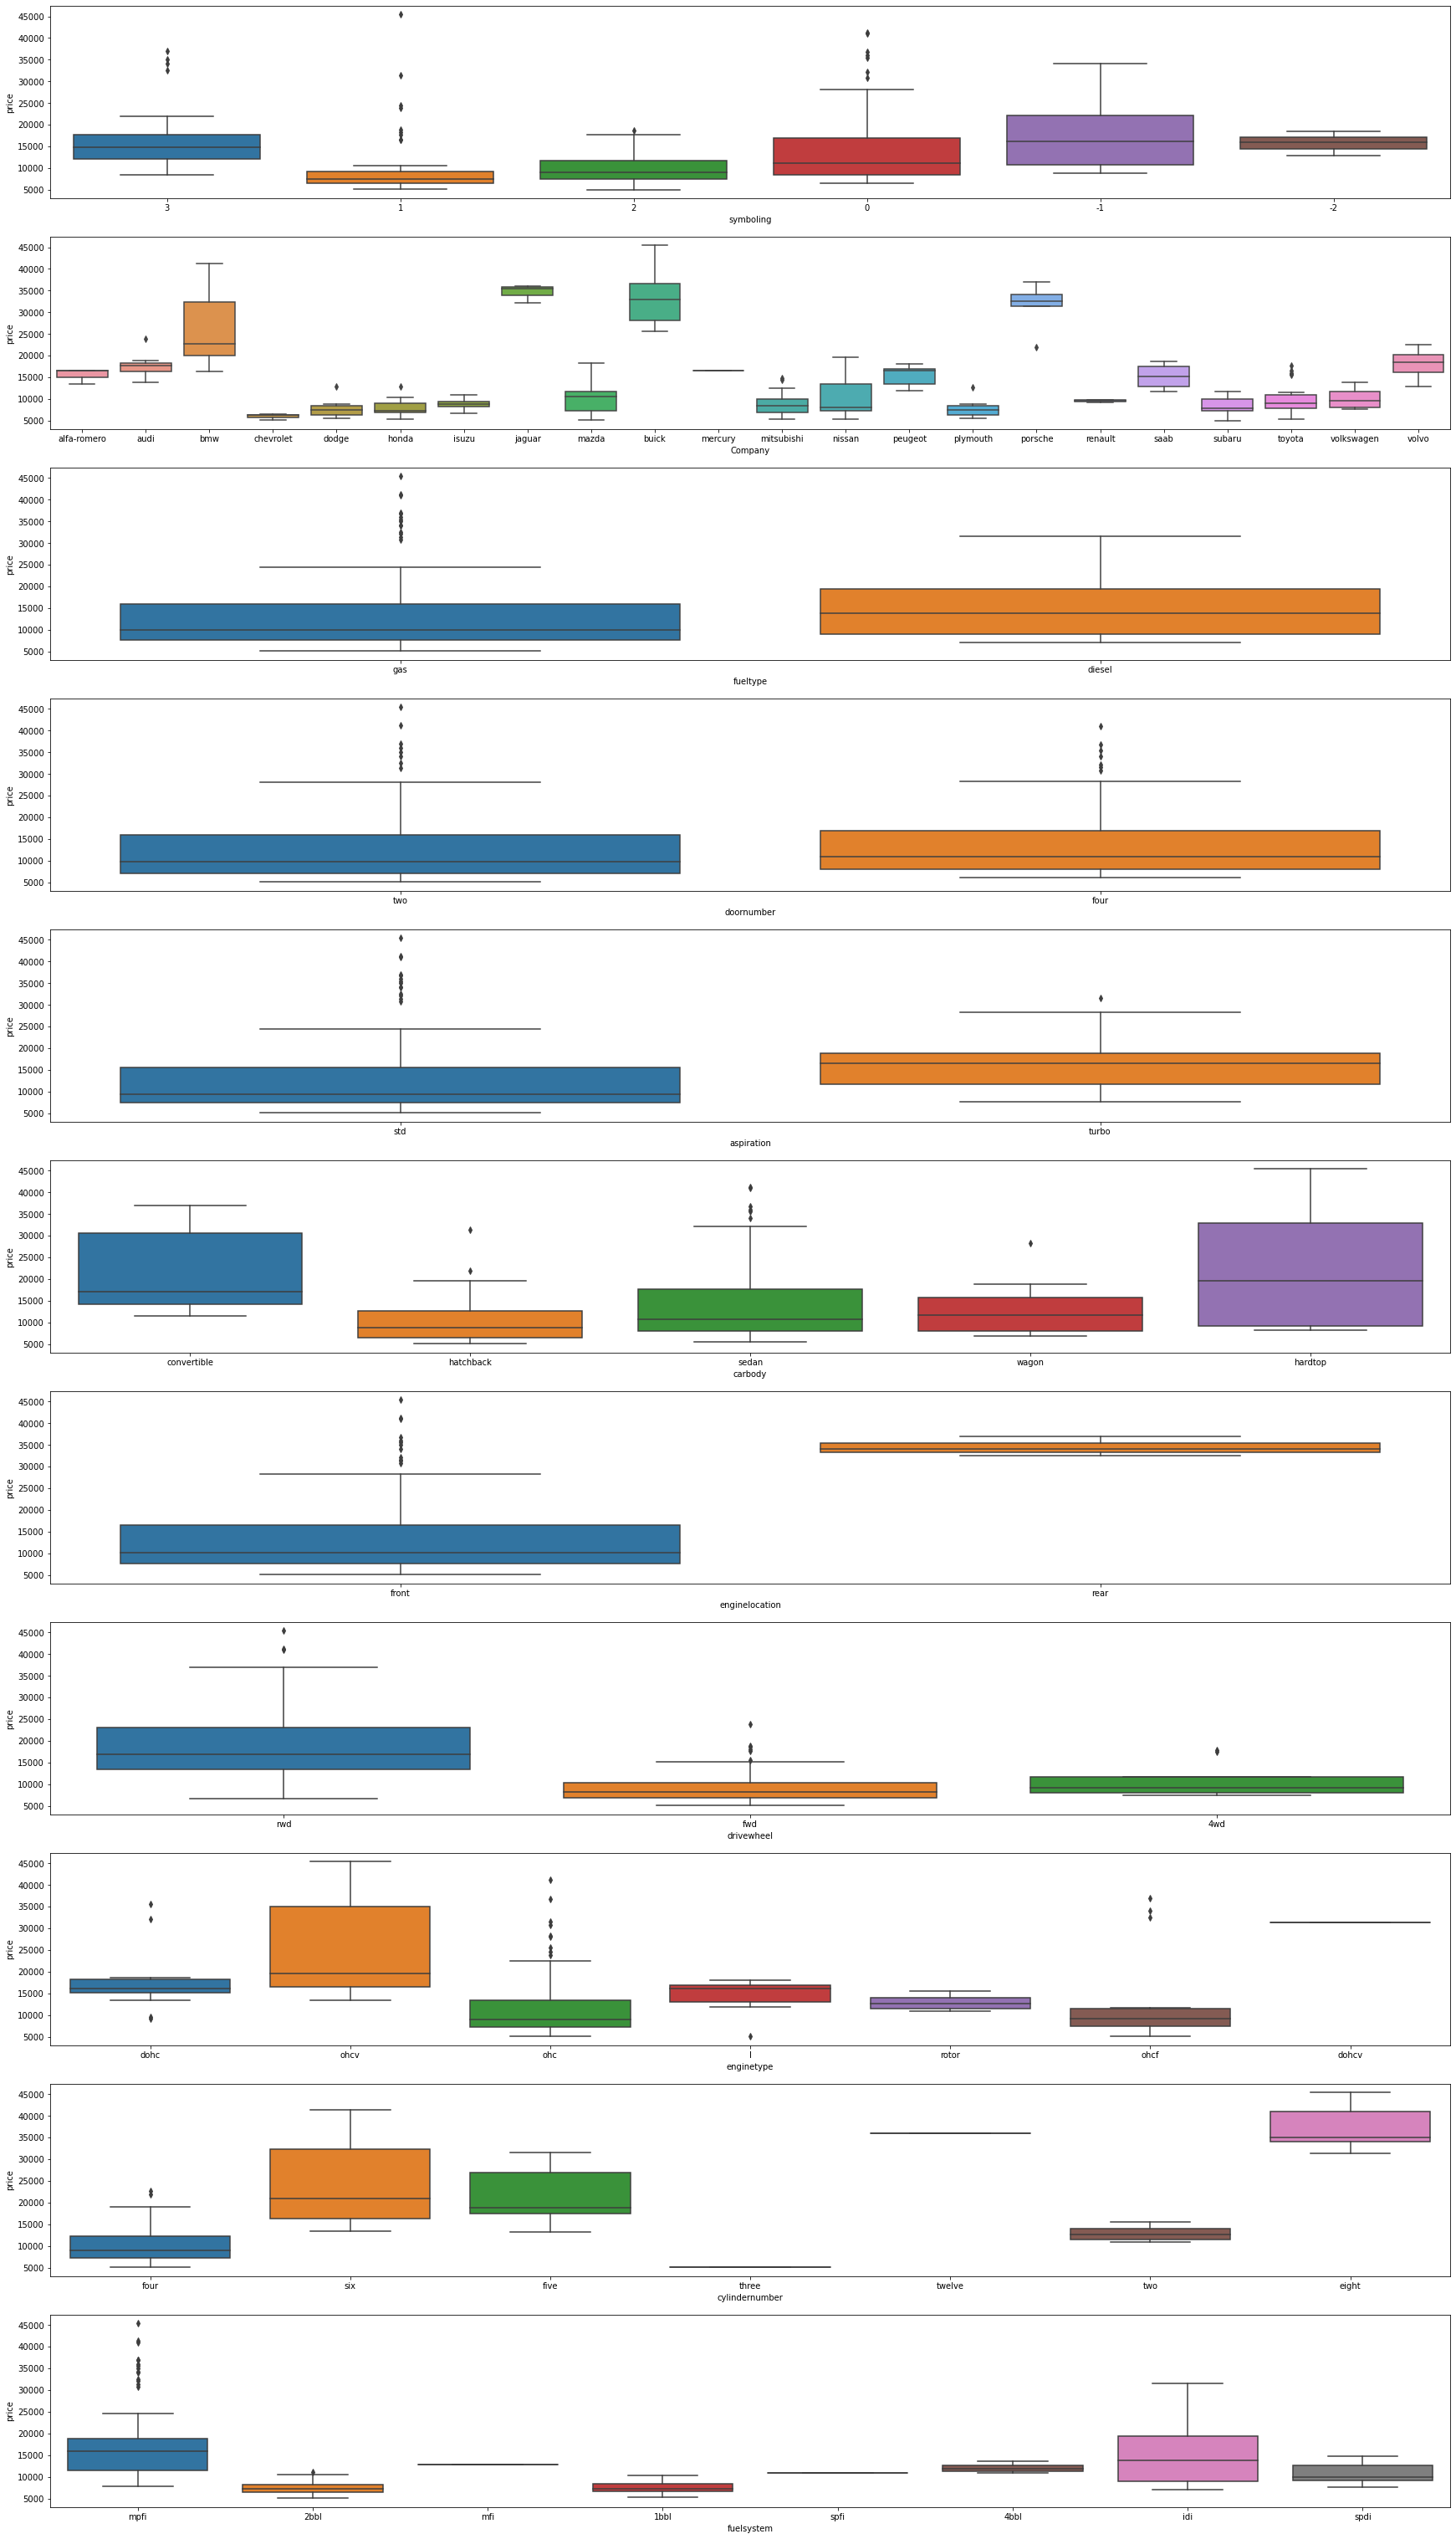

In [38]:
plt.figure(figsize=(30, 55))
plt.subplot(11,1,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_df)
plt.subplot(11,1,2)
sns.boxplot(x = 'Company', y = 'price', data = car_df)
plt.subplot(11,1,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)
plt.subplot(11,1,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)
plt.subplot(11,1,5)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)
plt.subplot(11,1,6)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)
plt.subplot(11,1,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)
plt.subplot(11,1,8)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)
plt.subplot(11,1,9)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df)
plt.subplot(11,1,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)
plt.subplot(11,1,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)
plt.show()

* Price of -1 symboling is higher in compare to others
* Price of diesel is much higher than of gas , also there are some outliers in gas vehicles.so the cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
* DoorNumber isn't affecting the price much.there is slight difference in distributions of cars having two doors vs cars having 4 doors
* Price of turbo is higher in compared to std , although there are some outliers in std price
* Price of hardtop is very high compare to others and most of the carbodies are relatively cheaper as compared to convertible carbody.
* The cars with rear enginelocation are way expensive than cars with front enginelocation.
* Price range of rwd drivewheel cars is quite high compare to others.
* Price range of ohcv engine cars are quite high in compare to others.
* according to cylinder number
    * The price of car is directly proportional to no. of cylinders in most    cases.
    * There is only 1 car having cylinder number 3 and 12 .
    * Car having cylinder number eight has higher price range.
* Price range are high of car having idi fuel system

### Data Preparation

#### Creation of Dummy Variables

In [39]:
catdf

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,-1,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,-1,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [40]:
catvalue=['Company','fueltype','aspiration','doornumber', 'carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [41]:
#using get_dummies() for the categorical feature and store it in a new variable - 'dummies'
car_dummies = pd.get_dummies(car_df[catvalue])
car_dummies.shape

(205, 60)

In [42]:
# Add the results to the original dataframe

car_df = pd.concat([car_df,car_dummies], axis = 1)
car_df.shape

(205, 84)

In [43]:
# Drop the original categorical variables with categorical values as dummies are already created

car_df.drop(car_df[catvalue],axis = 1, inplace = True)

In [44]:
car_df.shape

(205, 74)

In [45]:
car_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
car_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    object 
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  price                  205 non-null    float64
 13  avg_mpg                205 non-null    float64
 14  Company_alfa-romero    205 non-null    uint8  
 15  Company_aud

### Feature Scaling

In [48]:
# rescale the variables for having a comparable scale.
# scaling the features
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
numdf

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avg_mpg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,24.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,24.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,22.5
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,27.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,16845.0,25.5
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19045.0,22.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,21485.0,20.5
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,22470.0,26.5


In [54]:
# Apply scaler() to all the columns except for dummy variables
num_var = ['symboling','horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','stroke','compressionratio','carlength','carwidth','carheight','peakrpm','avg_mpg','price']

car_df[num_var] = scaler.fit_transform(car_df[num_var])
car_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [55]:
car_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,...,0,0,0,0,0,0,0,1,0,0
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,...,0,0,0,0,0,0,0,1,0,0
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,...,0,0,0,0,0,0,0,1,0,0
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,...,0,0,0,0,0,1,0,0,0,0


In [56]:
car_df['price']

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64

In [57]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    float64
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    float64
 6   enginesize             205 non-null    float64
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    float64
 11  peakrpm                205 non-null    float64
 12  price                  205 non-null    float64
 13  avg_mpg                205 non-null    float64
 14  Company_alfa-romero    205 non-null    uint8  
 15  Company_aud

#### Dividing into X and Y sets for the model building

In [58]:
#Split the data into X and Y.
#Independent variables
X = car_df.drop('price',axis = 1)
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,1,0,0


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    float64
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    float64
 6   enginesize             205 non-null    float64
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    float64
 11  peakrpm                205 non-null    float64
 12  avg_mpg                205 non-null    float64
 13  Company_alfa-romero    205 non-null    uint8  
 14  Company_audi           205 non-null    uint8  
 15  Company_bmw

In [60]:
#Dependent variable
Y = car_df.price
Y.head()

0    0.207959
1    0.282558
2    0.282558
3    0.219254
4    0.306142
Name: price, dtype: float64

### Train-Test split of data.

In [61]:
# Importing library for splitting
from sklearn.model_selection import train_test_split

In [62]:
#train-test split:from X and Y ,divide it into train and test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7,test_size = 0.3, random_state=100)

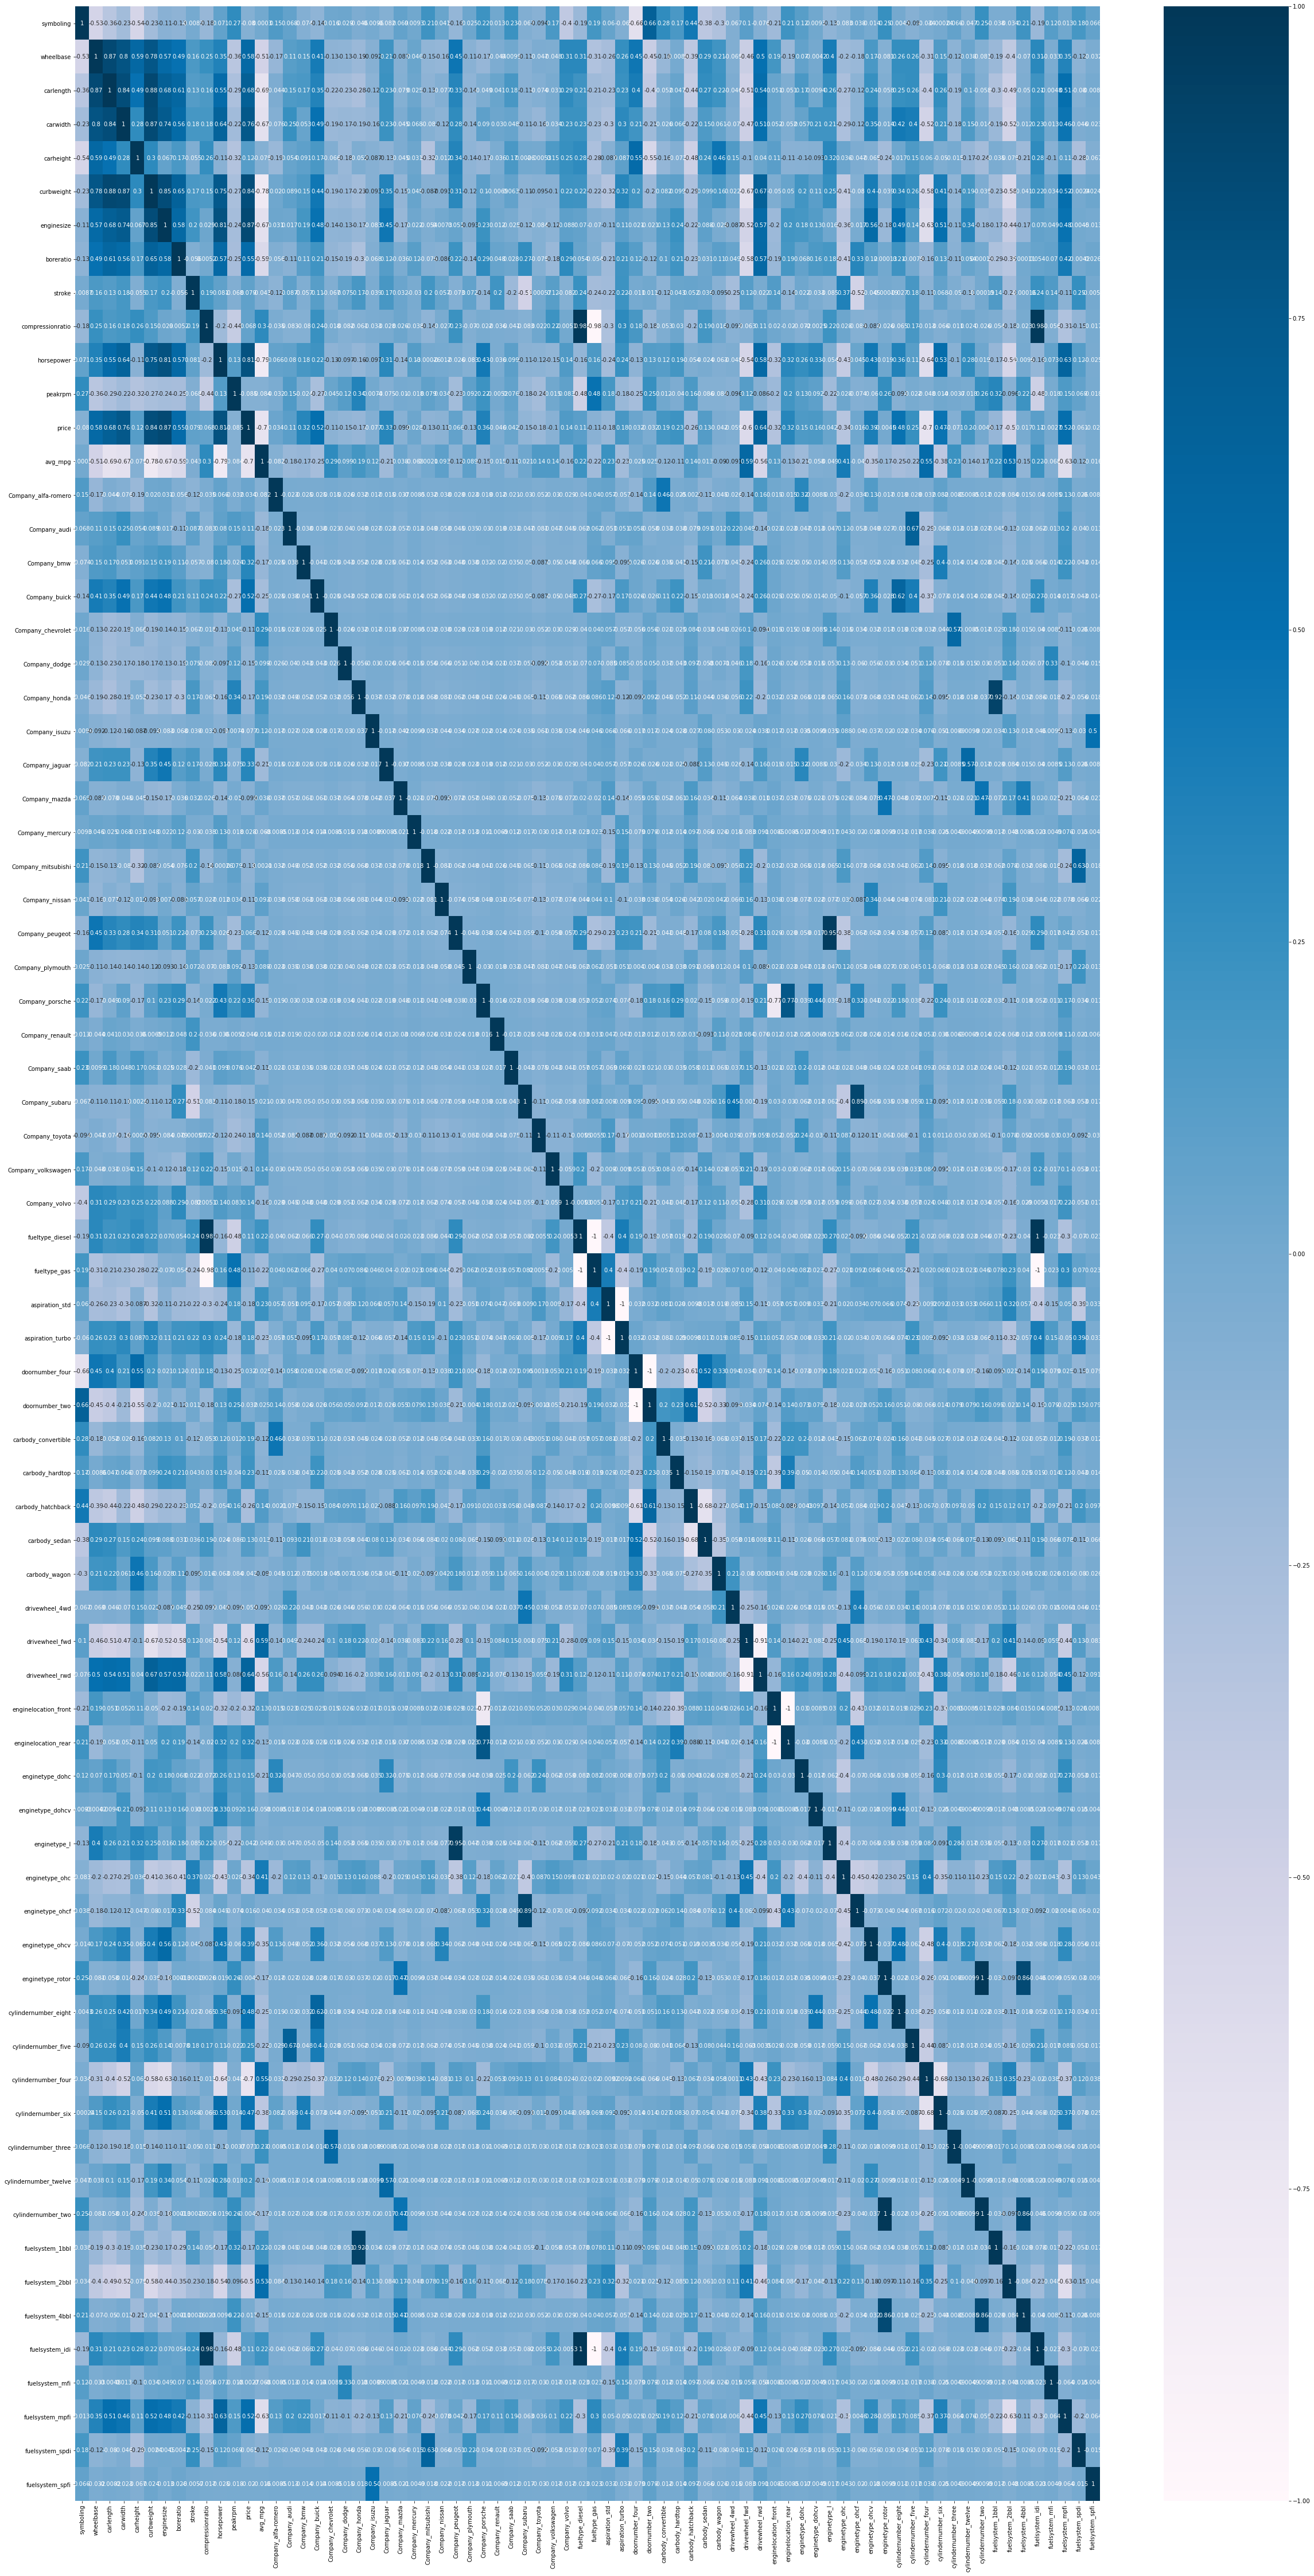

In [63]:
# Checking correlation coeffiecients to see which variables are highly correlted

plt.figure(figsize = (40,80))
sns.heatmap(car_df.corr(), annot = True, cmap = 'PuBu')
plt.show()

### Model Building and Evaluation

In [64]:
#Building the first model
import statsmodels.api as sm

# Add a constant otherwise it will be straight line from zero
X_train_mlr = sm.add_constant(X_train)

# Create a first fitted model
mlr_1 = sm.OLS(Y_train, X_train_mlr).fit()

In [65]:
mlr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     59.02
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.20e-50
Time:                        12:53:17   Log-Likelihood:                 294.98
No. Observations:                 143   AIC:                            -476.0
Df Residuals:                      86   BIC:                            -307.1
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0466      0.034      1.356      0.179      -0.022       0.115
symboling                -0.0093      0.033     -0.279      0.781      -0.076       0.057
wheelbase                 0.2540      0.099      2.575      0.012       0.058       0.450
carlength                -0.1743      0.098     -1.784      0.078      -0.369       0.020
carwidth                  0.2280      0.090      2.541      0.013       0.050       0.406
carheight                -0.1711      0.050     -3.423      0.001      -0.270      -0.072
curbweight                0.3032      0.116      2.606      0.011       0.072       0.534
enginesize                1.7496      0.406      4.312      0.000       0.943       2.556
boreratio                -0.5930      0.163     -3.631      0.000      -0.918      -0.268
stroke                   -0.1713      0.079     -2.164      0.033      -0.329      -0.014
compressionratio         -0.3395      0.241     -1.406      0.163      -0.819       0.140
horsepower               -0.1658      0.186     -0.891      0.375      -0.536       0.204
peakrpm                   0.1691      0.046      3.709      0.000       0.078       0.260
avg_mpg                   0.0773      0.076      1.014      0.313      -0.074       0.229
Company_alfa-romero       0.0010      0.052      0.020      0.984      -0.102       0.104
Company_audi              0.0583      0.049      1.182      0.240      -0.040       0.156
Company_bmw               0.2940      0.044      6.746      0.000       0.207       0.381
Company_buick             0.0375      0.057      0.664      0.508      -0.075       0.150
Company_chevrolet        -0.0594      0.034     -1.749      0.084      -0.127       0.008
Company_dodge            -0.1048      0.024     -4.279      0.000      -0.153      -0.056
Company_honda            -0.0686      0.047     -1.457      0.149      -0.162       0.025
Company_isuzu            -0.0107      0.029     -0.368      0.714      -0.068       0.047
Company_jaguar           -0.1208      0.081     -1.490      0.140      -0.282       0.040
Company_mazda             0.0140      0.019      0.737      0.463      -0.024       0.052
Company_mercury       -2.712e-15   5.87e-16     -4.617      0.000   -3.88e-15   -1.54e-15
Company_mitsubishi       -0.1217      0.024     -5.017      0.000      -0.170      -0.073
Company_nissan            0.0154      0.020      0.779      0.438      -0.024       0.055
Company_peugeot          -0.2404      0.051     -4.747      0.000      -0.341      -0.140
Company_plymouth         -0.1069      0.029     -3.719      0.000      -0.164      -0.050
Company_porsche           0.2285      0.065      3.510      0.001       0.099       0.358
Company_renault          -0.0121      0.040     -0.301      0.764      -0.092       0.068
Company_saab           

### Feature Selection using RFE

In [66]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
#Init the transformer
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=15)

#Fit to the training data
rfe = rfe.fit(X_train_mlr, Y_train)

In [67]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('symboling', False, 60),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('avg_mpg', True, 1),
 ('Company_alfa-romero', True, 1),
 ('Company_audi', False, 34),
 ('Company_bmw', False, 26),
 ('Company_buick', True, 1),
 ('Company_chevrolet', False, 46),
 ('Company_dodge', False, 27),
 ('Company_honda', False, 45),
 ('Company_isuzu', False, 49),
 ('Company_jaguar', False, 11),
 ('Company_mazda', False, 44),
 ('Company_mercury', False, 20),
 ('Company_mitsubishi', False, 57),
 ('Company_nissan', False, 22),
 ('Company_peugeot', False, 32),
 ('Company_plymouth', False, 31),
 ('Company_porsche', False, 52),
 ('Company_renault', False, 40),
 ('Company_saab', False, 37),
 ('Company_subaru', False, 33),
 ('Company_toyota', False, 47),
 ('Company_volkswagen', False

In [68]:
rfe.support_[1:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [69]:
col = X_train.columns[rfe.support_[1:]]
col

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'avg_mpg', 'Company_bmw', 'aspiration_turbo'],
      dtype='object')

In [70]:
X_train.columns[~rfe.support_[1:]]

Index(['Company_alfa-romero', 'Company_audi', 'Company_buick',
       'Company_chevrolet', 'Company_dodge', 'Company_honda', 'Company_isuzu',
       'Company_jaguar', 'Company_mazda', 'Company_mercury',
       'Company_mitsubishi', 'Company_nissan', 'Company_peugeot',
       'Company_plymouth', 'Company_porsche', 'Company_renault',
       'Company_saab', 'Company_subaru', 'Company_toyota',
       'Company_volkswagen', 'Company_volvo', 'fueltype_diesel',
       'fueltype_gas', 'aspiration_std', 'doornumber_four', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_

In [71]:
### update the model
# Building the second model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_2 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     70.11
Date:                Thu, 26 May 2022   Prob (F-statistic):           7.05e-54
Time:                        12:54:07   Log-Likelihood:                 191.54
No. Observations:                 143   AIC:                            -351.1
Df Residuals:                     127   BIC:                            -303.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1721      0.074     -2.322      0.022      -0.319      -0.025
symboling            0.0378      0.033      1.148      0.253      -0.027       0.103
wheelbase           -0.0119      0.094     -0.126      0.900      -0.198       0.174
carlength           -0.1689      0.094     -1.790      0.076      -0.356       0.018
carwidth             0.2999      0.078      3.833      0.000       0.145       0.455
carheight            0.0164      0.042      0.386      0.700      -0.068       0.101
curbweight           0.3483      0.118      2.953      0.004       0.115       0.582
enginesize           0.4798      0.116      4.132      0.000       0.250       0.710
boreratio           -0.0265      0.045     -0.587      0.558      -0.116       0.063
stroke              -0.0959      0.045     -2.109      0.037      -0.186      -0.006
compressionratio     0.0898      0.037      2.429      0.017       0.017       0.163
horsepower           0.0919      0.103      0.890      0.375      -0.112       0.296
peakrpm              0.1272      0.044      2.891      0.005       0.040       0.214
avg_mpg             -0.0036      0.077     -0.047      0.963      -0.155       0.148
Company_bmw          0.2311      0.031      7.428      0.000       0.170       0.293
aspiration_turbo     0.0031      0.019      0.164      0.870      -0.035       0.041
==============================================================================
Omnibus:                       25.958   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.139
Skew:                           0.770   Prob(JB):                     1.06e-12
Kurtosis:                       5.623   Cond. No.                         49.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Checking

In [72]:
#Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,curbweight,87.17
2,carlength,71.55
3,carwidth,47.77
1,wheelbase,41.98
6,enginesize,34.92
10,horsepower,26.53
8,stroke,20.60
7,boreratio,18.90
4,carheight,14.74
12,avg_mpg,12.68


In [74]:
col = col.drop('carlength', 1)
col

Index(['symboling', 'wheelbase', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'avg_mpg', 'Company_bmw', 'aspiration_turbo'],
      dtype='object')

In [75]:
#Building the third model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_3 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     73.62
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.84e-54
Time:                        13:12:07   Log-Likelihood:                 189.76
No. Observations:                 143   AIC:                            -349.5
Df Residuals:                     128   BIC:                            -305.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2019      0.073     -2.771      0.006      -0.346      -0.058
symboling            0.0412      0.033      1.243      0.216      -0.024       0.107
wheelbase           -0.0685      0.089     -0.768      0.444      -0.245       0.108
carwidth             0.2691      0.077      3.495      0.001       0.117       0.421
carheight            0.0005      0.042      0.012      0.990      -0.082       0.083
curbweight           0.3022      0.116      2.603      0.010       0.073       0.532
enginesize           0.4913      0.117      4.201      0.000       0.260       0.723
boreratio           -0.0443      0.045     -0.995      0.322      -0.132       0.044
stroke              -0.1032      0.046     -2.258      0.026      -0.194      -0.013
compressionratio     0.0877      0.037      2.355      0.020       0.014       0.161
horsepower           0.1013      0.104      0.975      0.331      -0.104       0.307
peakrpm              0.1321      0.044      2.982      0.003       0.044       0.220
avg_mpg              0.0325      0.074      0.437      0.663      -0.115       0.180
Company_bmw          0.2269      0.031      7.252      0.000       0.165       0.289
aspiration_turbo     0.0101      0.019      0.531      0.596      -0.027       0.048
==============================================================================
Omnibus:                       23.289   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.987
Skew:                           0.717   Prob(JB):                     1.03e-10
Kurtosis:                       5.379   Cond. No.                         47.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,79.91
2,carwidth,45.37
1,wheelbase,37.19
5,enginesize,34.78
9,horsepower,26.46
7,stroke,20.09
6,boreratio,16.86
3,carheight,13.67
11,avg_mpg,12.41
0,symboling,10.31


In [77]:
col = col.drop('wheelbase', 1)
col

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'avg_mpg', 'Company_bmw', 'aspiration_turbo'],
      dtype='object')

In [78]:
#Building the fourth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_4 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     79.49
Date:                Thu, 26 May 2022   Prob (F-statistic):           5.64e-55
Time:                        13:12:42   Log-Likelihood:                 189.43
No. Observations:                 143   AIC:                            -350.9
Df Residuals:                     129   BIC:                            -309.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2045      0.073     -2.813      0.006      -0.348      -0.061
symboling            0.0512      0.031      1.676      0.096      -0.009       0.112
carwidth             0.2401      0.067      3.584      0.000       0.108       0.373
carheight           -0.0069      0.041     -0.169      0.866      -0.087       0.074
curbweight           0.2691      0.108      2.501      0.014       0.056       0.482
enginesize           0.4946      0.117      4.239      0.000       0.264       0.725
boreratio           -0.0456      0.044     -1.025      0.307      -0.133       0.042
stroke              -0.1071      0.045     -2.362      0.020      -0.197      -0.017
compressionratio     0.0885      0.037      2.380      0.019       0.015       0.162
horsepower           0.1287      0.097      1.320      0.189      -0.064       0.322
peakrpm              0.1290      0.044      2.929      0.004       0.042       0.216
avg_mpg              0.0349      0.074      0.470      0.639      -0.112       0.182
Company_bmw          0.2213      0.030      7.286      0.000       0.161       0.281
aspiration_turbo     0.0100      0.019      0.527      0.599      -0.027       0.047
==============================================================================
Omnibus:                       22.713   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.422
Skew:                           0.694   Prob(JB):                     1.37e-10
Kurtosis:                       5.387   Cond. No.                         46.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,66.71
4,enginesize,34.73
1,carwidth,34.36
8,horsepower,23.33
6,stroke,19.75
5,boreratio,16.79
2,carheight,12.80
10,avg_mpg,12.41
9,peakrpm,10.00
0,symboling,8.58


In [80]:
col = col.drop('horsepower', 1)
col

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'avg_mpg',
       'Company_bmw', 'aspiration_turbo'],
      dtype='object')

In [81]:
#Building the fifth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_5 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     85.48
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.40e-55
Time:                        13:13:15   Log-Likelihood:                 188.47
No. Observations:                 143   AIC:                            -350.9
Df Residuals:                     130   BIC:                            -312.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2067      0.073     -2.836      0.005      -0.351      -0.063
symboling            0.0557      0.030      1.832      0.069      -0.004       0.116
carwidth             0.2476      0.067      3.699      0.000       0.115       0.380
carheight           -0.0190      0.040     -0.477      0.634      -0.098       0.060
curbweight           0.2821      0.107      2.626      0.010       0.070       0.495
enginesize           0.5847      0.095      6.162      0.000       0.397       0.772
boreratio           -0.0391      0.044     -0.882      0.379      -0.127       0.049
stroke              -0.1195      0.044     -2.685      0.008      -0.207      -0.031
compressionratio     0.0794      0.037      2.166      0.032       0.007       0.152
peakrpm              0.1574      0.039      4.087      0.000       0.081       0.234
avg_mpg              0.0241      0.074      0.326      0.745      -0.122       0.171
Company_bmw          0.2249      0.030      7.414      0.000       0.165       0.285
aspiration_turbo     0.0189      0.018      1.068      0.287      -0.016       0.054
==============================================================================
Omnibus:                       25.826   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.605
Skew:                           0.760   Prob(JB):                     8.42e-13
Kurtosis:                       5.649   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,66.17
1,carwidth,34.12
4,enginesize,22.78
6,stroke,18.77
5,boreratio,16.58
2,carheight,12.05
9,avg_mpg,11.95
0,symboling,8.47
8,peakrpm,7.24
7,compressionratio,3.30


In [83]:
col = col.drop('boreratio', 1)
col

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'stroke', 'compressionratio', 'peakrpm', 'avg_mpg', 'Company_bmw',
       'aspiration_turbo'],
      dtype='object')

In [84]:
#Building the sixth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_6 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     93.34
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.08e-56
Time:                        13:13:58   Log-Likelihood:                 188.04
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     131   BIC:                            -316.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2343      0.066     -3.567      0.001      -0.364      -0.104
symboling            0.0540      0.030      1.781      0.077      -0.006       0.114
carwidth             0.2380      0.066      3.606      0.000       0.107       0.369
carheight           -0.0186      0.040     -0.469      0.640      -0.097       0.060
curbweight           0.2772      0.107      2.586      0.011       0.065       0.489
enginesize           0.5806      0.095      6.131      0.000       0.393       0.768
stroke              -0.1051      0.041     -2.540      0.012      -0.187      -0.023
compressionratio     0.0777      0.037      2.125      0.035       0.005       0.150
peakrpm              0.1651      0.038      4.402      0.000       0.091       0.239
avg_mpg              0.0344      0.073      0.471      0.638      -0.110       0.179
Company_bmw          0.2258      0.030      7.453      0.000       0.166       0.286
aspiration_turbo     0.0188      0.018      1.060      0.291      -0.016       0.054
==============================================================================
Omnibus:                       21.412   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.163
Skew:                           0.679   Prob(JB):                     1.90e-09
Kurtosis:                       5.213   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,62.37
1,carwidth,32.53
4,enginesize,22.77
5,stroke,17.37
2,carheight,11.81
8,avg_mpg,10.99
0,symboling,7.62
7,peakrpm,7.23
6,compressionratio,3.24
10,aspiration_turbo,1.76


In [86]:
col = col.drop('carheight', 1)
col

Index(['symboling', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'avg_mpg', 'Company_bmw',
       'aspiration_turbo'],
      dtype='object')

In [87]:
#Building the seventh model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_7 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.22e-57
Time:                        13:14:26   Log-Likelihood:                 187.92
No. Observations:                 143   AIC:                            -353.8
Df Residuals:                     132   BIC:                            -321.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2446      0.062     -3.959      0.000      -0.367      -0.122
symboling            0.0602      0.027      2.215      0.028       0.006       0.114
carwidth             0.2367      0.066      3.600      0.000       0.107       0.367
curbweight           0.2604      0.101      2.584      0.011       0.061       0.460
enginesize           0.6013      0.083      7.201      0.000       0.436       0.766
stroke              -0.1055      0.041     -2.559      0.012      -0.187      -0.024
compressionratio     0.0780      0.036      2.139      0.034       0.006       0.150
peakrpm              0.1685      0.037      4.597      0.000       0.096       0.241
avg_mpg              0.0314      0.073      0.433      0.666      -0.112       0.175
Company_bmw          0.2237      0.030      7.489      0.000       0.165       0.283
aspiration_turbo     0.0201      0.017      1.153      0.251      -0.014       0.055
==============================================================================
Omnibus:                       19.858   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.593
Skew:                           0.647   Prob(JB):                     1.87e-08
Kurtosis:                       5.073   Cond. No.                         37.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,43.69
1,carwidth,32.19
4,stroke,17.24
3,enginesize,16.78
7,avg_mpg,7.36
6,peakrpm,7.20
0,symboling,6.81
5,compressionratio,3.15
9,aspiration_turbo,1.72
8,Company_bmw,1.15


In [89]:
col = col.drop('avg_mpg', 1)
col

Index(['symboling', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'Company_bmw', 'aspiration_turbo'],
      dtype='object')

In [90]:
#Building the eighth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_8 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     115.4
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.20e-58
Time:                        13:15:04   Log-Likelihood:                 187.82
No. Observations:                 143   AIC:                            -355.6
Df Residuals:                     133   BIC:                            -326.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2218      0.032     -6.887      0.000      -0.285      -0.158
symboling            0.0571      0.026      2.184      0.031       0.005       0.109
carwidth             0.2343      0.065      3.587      0.000       0.105       0.363
curbweight           0.2328      0.078      2.996      0.003       0.079       0.386
enginesize           0.6083      0.082      7.453      0.000       0.447       0.770
stroke              -0.1038      0.041     -2.537      0.012      -0.185      -0.023
compressionratio     0.0873      0.029      2.980      0.003       0.029       0.145
peakrpm              0.1646      0.035      4.648      0.000       0.095       0.235
Company_bmw          0.2224      0.030      7.508      0.000       0.164       0.281
aspiration_turbo     0.0191      0.017      1.109      0.269      -0.015       0.053
==============================================================================
Omnibus:                       19.619   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.402
Skew:                           0.648   Prob(JB):                     3.39e-08
Kurtosis:                       5.023   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,39.40
1,carwidth,31.57
3,enginesize,16.77
4,stroke,12.66
6,peakrpm,7.06
0,symboling,6.34
5,compressionratio,2.39
8,aspiration_turbo,1.64
7,Company_bmw,1.14


In [92]:
col = col.drop('aspiration_turbo', 1)
col

Index(['symboling', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'Company_bmw'],
      dtype='object')

In [93]:
#Building the ninth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_9 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     129.5
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.42e-59
Time:                        13:16:34   Log-Likelihood:                 187.16
No. Observations:                 143   AIC:                            -356.3
Df Residuals:                     134   BIC:                            -329.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2279      0.032     -7.174      0.000      -0.291      -0.165
symboling            0.0591      0.026      2.260      0.025       0.007       0.111
carwidth             0.2356      0.065      3.605      0.000       0.106       0.365
curbweight           0.2606      0.074      3.541      0.001       0.115       0.406
enginesize           0.5781      0.077      7.507      0.000       0.426       0.730
stroke              -0.0970      0.040     -2.396      0.018      -0.177      -0.017
compressionratio     0.0919      0.029      3.166      0.002       0.034       0.149
peakrpm              0.1626      0.035      4.595      0.000       0.093       0.233
Company_bmw          0.2197      0.030      7.436      0.000       0.161       0.278
==============================================================================
Omnibus:                       19.081   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.786
Skew:                           0.626   Prob(JB):                     4.61e-08
Kurtosis:                       5.025   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,35.63
1,carwidth,31.56
3,enginesize,15.09
4,stroke,12.60
6,peakrpm,6.98
0,symboling,6.34
5,compressionratio,2.36
7,Company_bmw,1.13


here,all p values are in range,so we will be making predictions in the training set

### Residual Analysis

In [97]:
#check if the error terms are normally distributed.
Y_train_price = mlr_9.predict(X_train_mlr_1)

In [98]:
Y_train_price.head()

122    0.077896
125    0.370946
166    0.172796
1      0.203226
199    0.254713
dtype: float64

Text(0.5, 0, 'Errors')

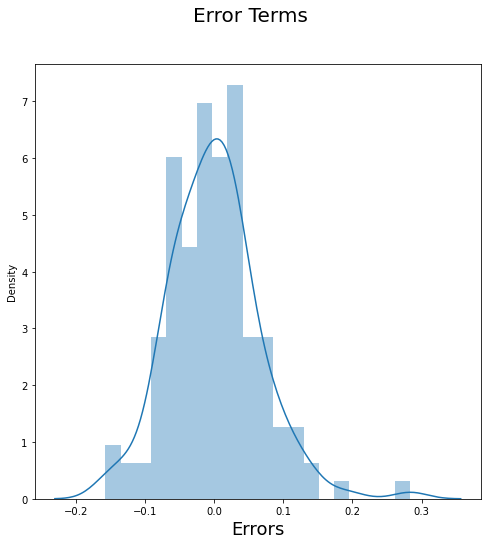

In [99]:
#Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions based on Model

In [100]:
x_test_try = sm.add_constant(X_test[col])

In [102]:
y_prediction = mlr_9.predict(x_test_try)

In [103]:
y_prediction.head()

160    0.028528
186    0.128824
59     0.144415
165    0.169258
140    0.066687
dtype: float64

### Predicted Values

In [104]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_prediction,'Difference':Y_test-y_prediction})
pred_df.head()

,Actual Value,Predicted Value,Difference
160,0.065041,0.028528,0.036513
186,0.083834,0.128824,-0.044990
59,0.092523,0.144415,-0.051892
165,0.103768,0.169258,-0.065489
140,0.061690,0.066687,-0.004997


### Model Evaluation

In [105]:
#Checking the accuracy of the test data
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_prediction)
score

0.8219394632934343

### Plotting results

Text(0, 0.5, 'y_pred')

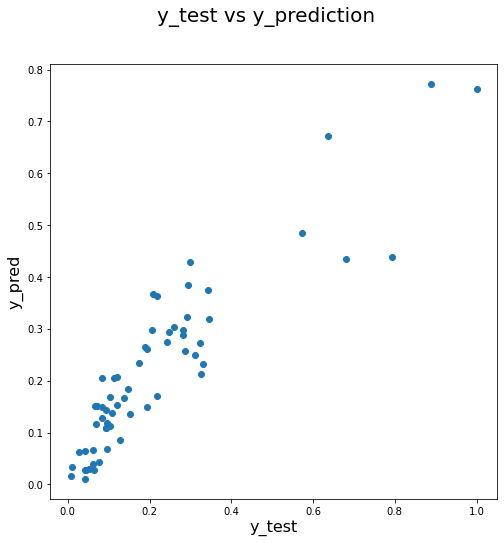

In [106]:
#Plotting the graph between actual price vs predicted values
fig = plt.figure()
plt.scatter(Y_test, y_prediction)
fig.suptitle('y_test vs y_prediction', fontsize = 20) # Plot heading 
plt.xlabel('y_test', fontsize = 16) # X-label
plt.ylabel('y_pred', fontsize = 16)  # Y-Label

<AxesSubplot:xlabel='price'>

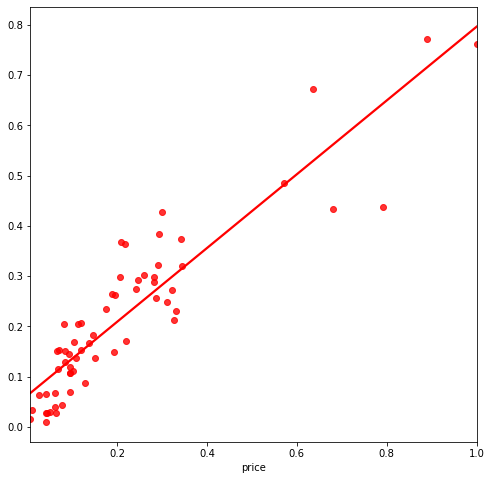

In [107]:
#Plotting the regression line
sns.regplot(x=Y_test,y=y_prediction,ci=None,color ='red')

### Result
* The model is built with significant features that helps in predicting the price of a car and the accuracy of the test data set is found to be 82%

* The equation of the best fitted line is: price = -0.2279 + 0.0591symboling + 0.2356carwidth + 0.2606curbweight + 0.5781enginesize + -0.0970stroke + 0.0919compressionratio + 0.1626peakrpm +.2197Company_bmw
* p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.